# Coffee Bean Classification with Deep Learning


#### The Data
The csv file contains 4 columns for the data.

- the filepaths column contains the relative path to the image file
- the labels column contains the text label associated with the image file
- the data set column defines which dataset the image file belongs to (either train or test)
- the class index column defines the integer index of the images class where:

******************************************

* class Dark has class index 0
* class Green has class index 1
* class Light has class index 2
* class Medium has class index 3

**What are those classes?**

In [1]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['Dark' 'Green' 'Light' 'Medium']


**Let's create a function to visualize images randomly**

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (224, 224, 3)


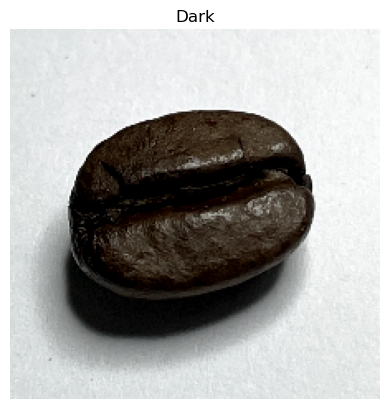

In [5]:
img = view_random_image(target_dir = "train/",
                        target_class = "Dark") # or we can write nike instead of converse to see converse examples

**What is the shape of a single image?**

In [7]:
import tensorflow as tf
img.shape #(width, height, colour channels)

(224, 224, 3)

**Let's visualize images from all categories**

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


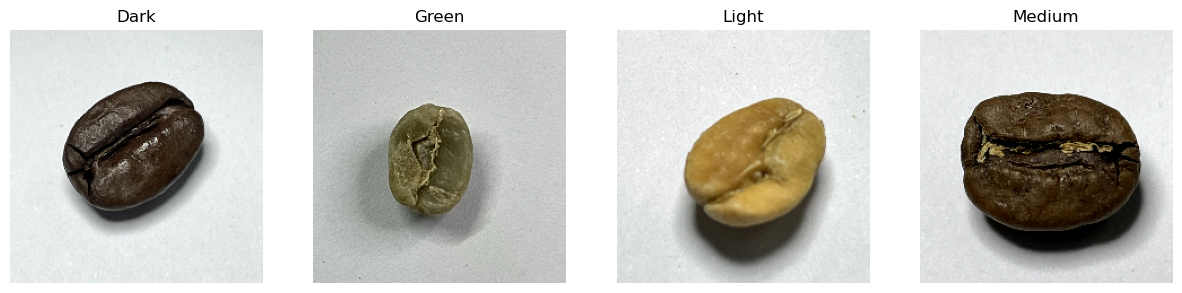

In [9]:
plt.figure(figsize = (15,7))
plt.subplot(1,4,1)
dark_bean_image = view_random_image("train/", "Dark")
plt.subplot(1,4,2)
green_bean_image = view_random_image("train/", "Green")
plt.subplot(1,4,3)
light_bean_image = view_random_image("train/", "Light")
plt.subplot(1,4,4)
medium_bean_image = view_random_image("train/", "Medium")

# 2. Data Preprocessing

**Importing the necessary libraries**

In [10]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

**Creating train test directories**

In [11]:
train_dir = "train/"
test_dir = "test/"

**Rescale the images and transfer them into batches**

In [12]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


# 3. Model Building

**Create a model on a base pre-trained model which is ResNet50V2 of Keras**

In [13]:
# 1. Create a base model with tf.keras.applications

base_model = tf.keras.applications.ResNet50V2(include_top= False,)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(224,224,3), name = "input-layer")

#4. Rescaling
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation = "softmax", name = "output-layer")(x)

# 8. Combine the inputs with outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])


history = model_0.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch = len(train_data),
                                 validation_data = test_data,
                                 validation_steps = int(0.25*len(test_data)),)



94668760/94668760 [==============================] - 7s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/5


38/38 [==============================] - 107s 2s/step - loss: 0.7293 - accuracy: 0.7375 - val_loss: 0.3321 - val_accuracy: 0.9271
Epoch 2/5
38/38 [==============================] - 87s 2s/step - loss: 0.2407 - accuracy: 0.9375 - val_loss: 0.1301 - val_accuracy: 0.9688
Epoch 3/5
38/38 [==============================] - 56s 1s/step - loss: 0.1682 - accuracy: 0.9642 - val_loss: 0.0908 - val_accuracy: 1.0000
Epoch 4/5
38/38 [==============================] - 53s 1s/step - loss: 0.1317 - accuracy: 0.9725 - val_loss: 0.0787 - val_accuracy: 1.0000
Epoch 5/5
38/38 [==============================] - 67s 2s/step - loss: 0.1092 - accuracy: 0.9767 - val_loss: 0.0855 - val_accuracy: 0.9896


**Let's look at the summary of model. It gives us information about the parameters**

In [14]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048   23564800  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 2048)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output-layer (Dense)        (None, 4)                 8196      
                                                                 
Total params: 23572996 (89.92 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________

**Let's evaluate the model on test_set**

In [15]:
model_0.evaluate(test_data)

13/13 [==============================] - 23s 2s/step - loss: 0.0816 - accuracy: 0.9850


[0.08160196244716644, 0.9850000143051147]

**A function to create loss and accuracy curves separately**

In [16]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

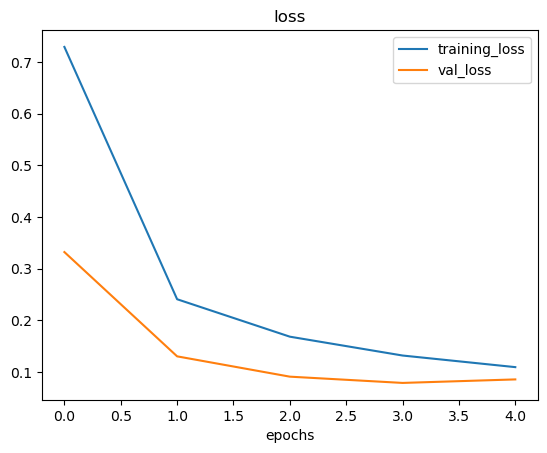

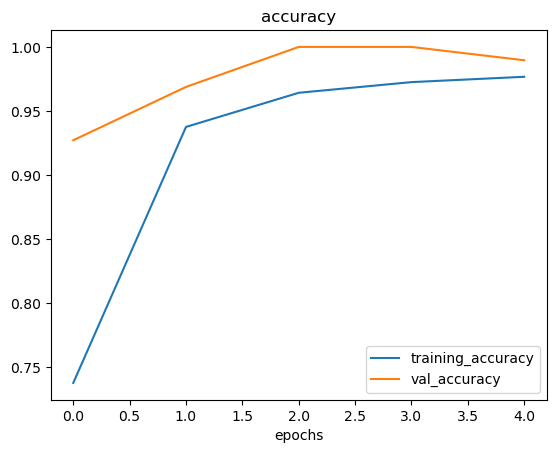

In [17]:
plot_loss_curves(history)

**Creating a function that preprocess the custom data**

In [29]:
def load_and_prep_image(filename, img_shape = 224):
  img = tf.io.read_file(filename) #read image
  img = tf.image.decode_image(img) # decode the image to a tensor
  img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
  img = img/255. # rescale the image
  return img

**A fucntion to make prediction on the custom data**

In [30]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

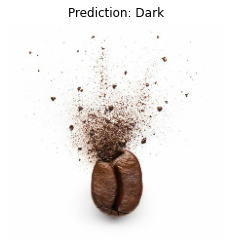

In [36]:
pred_and_plot(model_0, "7516e3c6cb6038c98971e78d7b6a2a27.jpg", class_names)